<a href="https://colab.research.google.com/github/PrinceWallyy/ACML-Assignment-2/blob/main/ACML_Assignment_2_Exercise_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocess

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.datasets import cifar10
from keras.utils import np_utils

np.random.seed(42)
tf.random.set_seed(42)

In [18]:
(x_train, _), (x_test, _) = cifar10.load_data()
data = np.vstack((x_train, x_test))
data = data / 255
(x_train, x_val, x_test) = np.vsplit(data, np.array([48000, 54000]))
assert x_train.shape == (48000, 32, 32, 3)
assert x_val.shape == (6000, 32, 32, 3)
assert x_test.shape == (6000, 32, 32, 3)

x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')

In [19]:
x_gray_train = tf.image.rgb_to_grayscale(x_train)
x_gray_val = tf.image.rgb_to_grayscale(x_val)
x_gray_test = tf.image.rgb_to_grayscale(x_test)

In [20]:
x_yiq_train = tf.image.rgb_to_yiq(x_train)
x_yiq_val = tf.image.rgb_to_yiq(x_val)
x_yiq_test = tf.image.rgb_to_yiq(x_test)

x_iq_train = np.delete(x_yiq_train, 0, axis=3)
x_iq_val = np.delete(x_yiq_val, 0, axis=3)
x_iq_test = np.delete(x_yiq_test, 0, axis=3)

# Grayscale - RGB

In [21]:
input_shape = (32, 32, 1)

In [22]:
def createModel():
  model = models.Sequential()
  model.add(layers.Conv2D(32, (7, 7), padding='same', activation='relu', input_shape=input_shape))
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))

  model.add(layers.Conv2D(32, (7, 7), padding='same', activation='relu'))
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))

  model.add(layers.Conv2D(32,(7, 7), padding='same', activation='relu'))
  model.add(layers.UpSampling2D(size=(2, 2)))

  model.add(layers.Conv2D(64, (7, 7), padding='same', activation='relu'))
  model.add(layers.UpSampling2D(size=(2, 2)))

  model.add(layers.Conv2D(3, (3, 3), padding='same', activation='sigmoid'))

  return model

In [23]:
model = createModel()
model.compile(optimizer='adam', loss='mean_squared_error', metrics='accuracy')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        1600      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 32)        50208     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 32)          50208     
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)       

In [24]:
history = model.fit(x_gray_train, x_train, epochs=10, validation_data=(x_gray_val, x_val))

Epoch 1/10
1500/1500 [==============================] - 20s 13ms/step - loss: 0.0130 - accuracy: 0.4660 - val_loss: 0.0111 - val_accuracy: 0.5002
Epoch 2/10
1500/1500 [==============================] - 20s 13ms/step - loss: 0.0094 - accuracy: 0.4827 - val_loss: 0.0090 - val_accuracy: 0.5089
Epoch 3/10
1500/1500 [==============================] - 19s 13ms/step - loss: 0.0087 - accuracy: 0.4880 - val_loss: 0.0084 - val_accuracy: 0.4768
Epoch 4/10
1500/1500 [==============================] - 19s 13ms/step - loss: 0.0083 - accuracy: 0.4937 - val_loss: 0.0093 - val_accuracy: 0.4519
Epoch 5/10
1500/1500 [==============================] - 20s 13ms/step - loss: 0.0079 - accuracy: 0.4992 - val_loss: 0.0084 - val_accuracy: 0.5278
Epoch 6/10
1500/1500 [==============================] - 19s 13ms/step - loss: 0.0077 - accuracy: 0.5014 - val_loss: 0.0086 - val_accuracy: 0.4738
Epoch 7/10
1500/1500 [==============================] - 19s 13ms/step - loss: 0.0075 - accuracy: 0.5027 - val_loss: 0.0074 -

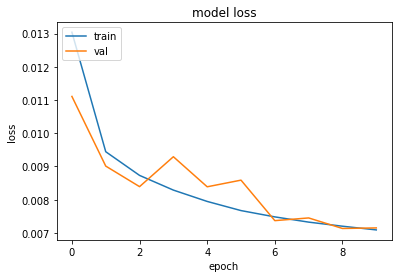

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [26]:
loss, accuracy = model.evaluate(x_gray_test, x_test)
print('Test Error Rate: ', round((1 - accuracy) * 100, 2))

188/188 [==============================] - 1s 6ms/step - loss: 0.0070 - accuracy: 0.5225
Test Error Rate:  47.75


In [27]:
pred_imgs = model.predict(x_gray_test)

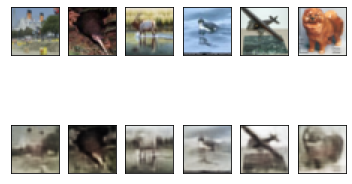

In [28]:
n = 6
for i in range(n):
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(pred_imgs[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Grayscale - Chrominance

In [29]:
input_shape = (32, 32, 1)

In [30]:
def createModel():
  model = models.Sequential()
  model.add(layers.Conv2D(32, (7, 7), padding='same', activation='relu', input_shape=input_shape))
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))

  model.add(layers.Conv2D(16, (7, 7), padding='same', activation='relu'))
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))

  model.add(layers.Conv2D(16,(7, 7), padding='same', activation='relu'))
  model.add(layers.UpSampling2D(size=(2, 2)))

  model.add(layers.Conv2D(32, (7, 7), padding='same', activation='relu'))
  model.add(layers.UpSampling2D(size=(2, 2)))

  model.add(layers.Conv2D(2, (3, 3), padding='same', activation='sigmoid'))

  return model

In [31]:
model = createModel()
model.compile(optimizer='adam', loss='mean_squared_error', metrics='accuracy')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 32)        1600      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 16)        25104     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 8, 8, 16)          12560     
_________________________________________________________________
up_sampling2d_4 (UpSampling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 32)       

In [32]:
history = model.fit(x_gray_train, x_iq_train, epochs=10, validation_data=(x_gray_val, x_iq_val))

Epoch 1/10
1500/1500 [==============================] - 16s 10ms/step - loss: 0.0044 - accuracy: 0.6579 - val_loss: 0.0039 - val_accuracy: 0.6531
Epoch 2/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0039 - accuracy: 0.6585 - val_loss: 0.0039 - val_accuracy: 0.6531
Epoch 3/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0039 - accuracy: 0.6586 - val_loss: 0.0039 - val_accuracy: 0.6531
Epoch 4/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0039 - accuracy: 0.6586 - val_loss: 0.0039 - val_accuracy: 0.6531
Epoch 5/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0039 - accuracy: 0.6586 - val_loss: 0.0039 - val_accuracy: 0.6531
Epoch 6/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0039 - accuracy: 0.6586 - val_loss: 0.0039 - val_accuracy: 0.6532
Epoch 7/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0039 - accuracy: 0.6587 - val_loss: 0.0039 -

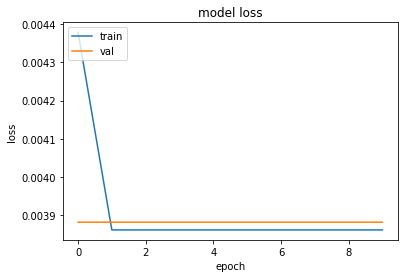

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [34]:
loss, accuracy = model.evaluate(x_gray_test, x_iq_test)
print('Test Error Rate: ', round((1 - accuracy) * 100, 2))

188/188 [==============================] - 1s 6ms/step - loss: 0.0038 - accuracy: 0.6586
Test Error Rate:  34.14


In [35]:
pred_iq_imgs = model.predict(x_gray_test)
pred_yiq_imgs = np.concatenate((x_gray_test, pred_iq_imgs), axis=3)
pred_rgb_imgs = tf.image.yiq_to_rgb(pred_yiq_imgs)

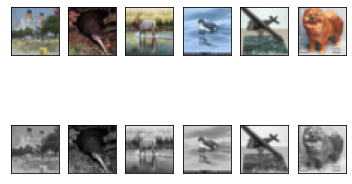

In [36]:
n = 6
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(pred_rgb_imgs[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()